In [1]:
import os
import shutil

import re
import time
import pandas as pd


Corpus = pd.read_csv('19-07-21-Scopus/Fusion/Dataset-IEEE-Scopus-Snowball-vf.csv',header=0, engine='python', warn_bad_lines=True, error_bad_lines=False)

#Corpus.head()

In [2]:
Corpus.dropna(subset = ["Author Keywords"], inplace=True)
Corpus.dropna(subset = ["Title"], inplace=True)
Corpus.dropna(subset = ["Abstract"], inplace=True)

Corpus.reset_index(drop=True, inplace=True)
#Corpus.head()

In [3]:
PatternsInn = []
#Remove All words that could mess our classification
Patterns = ['post translational','translation initiation','translational science','braille','binary translation',
            'kinematic','unstructured data','voice','3D','2D','twitter','facebook','comment','tweet','image','transliteration',
            'speech','uml','social media','spoken','signal','video','optical character','ORC','sign language','sign languages',
            'programming languages','programming language','implementation language','implementation languages','dialect',
            'compiler','compilers','compiling','decompiling','decompiled','decompilation','automatic code translation',
            'machine code translation','music','musical','source code','caption','tv','multimedia','orc','2d','3d','social network',
            'social networking']

#Lang = [word.lower() for word in Languages]
# Recognition for IEEE
for i in range(len(Corpus["Title"])): 
    #res = re.sub(r'[^\w\s]', ' ', df.astype(str)["Document Title"][i]+df.astype(str)["Abstract"][i]+df.astype(str)["Author Keywords"][i])
    #res = re.sub(r'[^\w\s]', ' ', str(csv_fileIEEE["Titles & Keywords"][i]))
    #texto = res.lower().split()
    PatternsIn = []
    Title_AuthKey = str(Corpus["Title"][i].lower()+' '+Corpus["Author Keywords"][i].lower())
    for j in range(len(Patterns)):
        a = re.sub(r'[^\w\s]', ' ', Title_AuthKey)
        b = r'\b' + r'\b.*\b'.join(re.escape(word) for word in Patterns[j].split(' ')) + r'\b'
        c = bool(re.search(b,a))
        if c == True:
            PatternsIn.append(Patterns[j])
    PatternsInn.append(PatternsIn)
    
Corpus["Patterns"] = PatternsInn
print("The number of Patterns that the program can recognize :"+str(len(Patterns)))
print('the program is running .....  ')
Corpus.head()

The number of Patterns that the program can recognize :50
the program is running .....  


,Title,Abstract,Author Keywords,Link,Year,Cited by,Page start,Page end,Page count,DOI,Authors,Document Type,Source,Patterns
0,Creating a multimodal translation tool and tes...,Commercial software tools for translation have...,Agile development; Computer-aided translation;...,https://www.scopus.com/inward/record.uri?eid=2...,2019,2.0,NaN,NaN,1,10.3390/informatics6010013,"Teixeira C.S.C., Moorkens J., Turner D., Vreek...",Article,Scopus,[voice]
1,A structure-based model for Chinese organizati...,Named entity (NE) translation is a fundamental...,Alignment; Chunk; Hierarchical derivation; Mac...,https://www.scopus.com/inward/record.uri?eid=2...,2008,9.0,NaN,NaN,1,10.1145/1330291.1330292,"Chen Y., Zong C.",Article,Scopus,[]
2,Ancient-modern Chinese translation with a new ...,Ancient Chinese brings the wisdom and spirit c...,Ancient-Modern Chinese parallel corpus; Biling...,https://www.scopus.com/inward/record.uri?eid=2...,2019,NaN,NaN,NaN,1,10.1145/3325887,"Dayiheng L.I.U., Yang K., Qu Q., Jiancheng L.V.",Article,Scopus,[]
3,"Matching graph, a method for extracting parall...",Comparable corpora are valuable alternatives f...,And Arabic languages; Comparable corpora; Engl...,https://www.scopus.com/inward/record.uri?eid=2...,2019,NaN,NaN,NaN,1,10.1145/3329713,"Bakhshaei S., Safabakhsh R., Khadivi S.",Article,Scopus,[]
4,Modeling monolingual character alignment for a...,Automatic evaluation of machine translations i...,And Phrases: Automatic evaluation; Chinese cha...,https://www.scopus.com/inward/record.uri?eid=2...,2016,4.0,NaN,NaN,1,10.1145/2815619,"Li M., Wang M., Li H., Xu F.",Article,Scopus,[]


In [4]:
#Corpus.to_excel("19-07-21-Scopus\Fusion\PatternsTestAll1.xlsx", index=False)

In [5]:
#type(Corpus['Patterns'][0])
#Corpus = Corpus.loc[(Corpus['Patterns'] == [])]
Corpus = Corpus.loc[Corpus.astype(str)['Patterns'] == '[]']
Corpus.reset_index(drop=True, inplace=True)
#Corpus

In [6]:
Languages_Translation = []
Languages = ["mandarin","chinese","spanish","Jalaa","Maori","Ryukyuan","Maroon","Mayan","Sranan","Nahuatl","mam",
             "Patois","Xinca","Quiche","Kekchi","Cakchiquel","Nahua","Carib","Amerindian","Garifuna","Mesrop",
             "Khenkha","Tshanglakha","Lhotsamkha","Nepalese","Waray","Pampango","Pangasinense","Bicol","Aramaic",
             "Circassian","Tajik","Baluchi","Khalkha","mongol","Dhivehi","Maldivian","Altaic","Kyrgyz","Bahasa",
             "Hangungmal","Qazaq","Turcoman","Assyrian","Yiddish","Judeo","Ladino","Tuvaluan","Kejia","Tibetan",
             "Tibet","Mongolian","Bhutanese","Darussalam","Dzongkha","Farsi","Turkic","Azeri","Bislama","Bichelama",
             "Ulithian","Pitcairnese","Pisin","Motu","Sonsoralese","Angaur","Carolinian","Niuean","Tongan",
             "Polynesian","Melanesian","Kapingamarangi","Tahitian","Nukuoro","Woleaian","Trukese","Pohnpeian",
             "Kosrean","Yapese","Kiribati","Chamorro","Ibibio","Fijian","Welsh","gaelic","Samoan ","Nordic",
             "Monegasque","Gagauz","Lahnda","Llanito ","Sami","Castilian","Zande","Chadic","Sena","Volta","twi",
             "Wolof","Umbundu","Tsoa","Tshivenda","Tshiluba","Tshwa","kua","Tonga","Swazi","Seychellois",
             "Mauritian","Noon","Nambya","Ndau","Kimbundu","Sotho","Luganda","Lingala","Kituba","Kongo","fon",
             "Fulani","Kikongo","Verdean","Abron","Afar","Dangme","Berber","Khoekhoe","Seychelles","Comorian",
             "Sesotho","Ndebele","Sepedi","Setswana","Tswana","Sindebele","Tigrinya","Swati","Swahili","Tsonga",
             "Venda","Soranî","Mimi","Ga","Yeni","Shabo","Weyto","Wutana","Mpra","Oropom","Ongota","Oblo","Bangi",
             "Meyobe","Mawa","Luo","Kujarge","Lufu","Laal","Lezgi","Hadza","Irimba","Gumuz","Gomba","Bayot","Ega",
             "Dompo","Ingush","Kabardian","Tatar","Esperanto","Chechen","Chuvash","Dargwa","Bashkir","Riksmål",
             "Latin","Riksmal","Galician","Catalan","Tamazight","Sorani","Slovene","Afrikaans","Armenian","Slovak",
             "Danish","Norwegian","Icelandic","Finnish","Dhundhari","Fuzhou","Balochi","Xhosa","Belarusian","Mossi",
             "Ilocano","Shona","Hiligaynon","Ilonggo","Hmong","Swedish","Quechua","Kirundi","Haitian","Creole",
             "Zhuang","Akan","Chewa","Haryanvi","Marwari","Madurese","Turkmen","Serbo","Sinhala","Malagasy",
             "Croatian","Fula","Gan","Visayan","Awadhi","Oromo","Sundanese","Teochew","Min","Cantonese","Hokkien",
             "Shanghainese","english","Bodo","Filipino","Dogri","Santhali","Oriya","Sanskrit","hindi","Manipuri",
             "Konkani","Kashmiri","hindustani","bengali","portuguese","russian","japanese","western","punjabi",
             "marathi","Telugu","Wu","Turkish","Korean","French","German","Vietnamese","Tamil","Yue","Urdu",
             "Javanese","Italian","Egyptian","Arabic","Gujarati","Iranian","Persian","Bhojpuri","Minnan","nan",
             "banlam","Hakka","Jin","Hausa","Kannada","Indonesian","Malay","Polish","Yoruba","Xiang","Malayalam",
             "Odia","Maithili","Burmese","Sunda","Sudanese","Algerian","Moroccan","Ukrainian","Igbo","Uzbek",
             "Sindhi","Romanian","Tagalog","Dutch","Amharic","Putonghua","Pashto","Magahi","Thai","Saraiki",
             "Khmer","Chhattisgarhi","Somali","Malaysian","Malay","Cebuano","Nepali","Mesopotamian","Avar",
             "Assamese","Sinhalese","Kurdish","Hejazi","Nigerian","Fulfulde","Bavarian","Azerbaijani","Greek",
             "Chittagonian","Kazakh","Deccan","Hungarian","Kinyarwanda","Zulu","Levantine","Tunisian","Sanaani",
             "MinBei","Bei","Rundi","Czech","Taʽizzi-Adeni","Uyghur","MinDong","Dong","Sylheti","Hinglish"]
Lang = [word.lower() for word in Languages]
# Recognition for IEEE
for i in range(len(Corpus["Title"])): 
    #res = re.sub(r'[^\w\s]', ' ', df.astype(str)["Document Title"][i]+df.astype(str)["Abstract"][i]+df.astype(str)["Author Keywords"][i])
    res = re.sub(r'[^\w\s]', ' ', str(Corpus["Title"][i]+' '+ Corpus["Abstract"][i]+' '+Corpus["Author Keywords"][i]))
    Title = res.lower().split() 
    Languages_Translation.append(list(set(Title) & set(Lang)))
Corpus["From-->Too"] = Languages_Translation 
print("The number of languages that our Program can recognize is :"+str(len(Lang)))
Corpus.to_excel("19-07-21-Scopus\Fusion\LastCorpus\AllCorpus.xlsx", index=False)
print('the lenght of the corpus after removing all patterns and indentifying all languages : '+str(len(Corpus)))

The number of languages that our Program can recognize is :334
the lenght of the corpus after removing all patterns and indentifying all languages : 2064


In [7]:

#Corpus Lang identification
Corpus_NoLang = Corpus[Corpus.astype(str)["From-->Too"] == '[]']
Corpus_Lang = Corpus[Corpus.astype(str)["From-->Too"] != '[]']
Corpus_NoLang.reset_index(drop=True, inplace=True)
Corpus_Lang.reset_index(drop=True, inplace=True)

Corpus_Lang.to_excel("19-07-21-Scopus\Fusion\LastCorpus\CorpusLang.xlsx", index=False)
Corpus_NoLang.to_excel("19-07-21-Scopus\Fusion\LastCorpus\CorpusNoLang.xlsx", index=False)
#Corpus_Lang

print('the number of artciles that describ machine translation of human language to another language :'+str(len(Corpus_Lang)))
print('the number of articles that describ machine translation generally:'+str(len(Corpus_NoLang)))


the number of artciles that describ machine translation of human language to another language :1287
the number of articles that describ machine translation generally:777


In [8]:
from re import search
#df[df.astype(str)["From --> Too"] != '[]']
#df_ar = dfof[dfof["From-->Too"].str.contains(r"arabic")]
#f_ar = dfof[pd.DataFrame(dfof["From-->Too"].tolist()).isin(['arabic']).any(1).values]
#f_en = dfof[pd.DataFrame(dfof["From-->Too"].tolist()).isin(['english']).any(1).values]
#f_fr = dfof[pd.DataFrame(dfof["From-->Too"].tolist()).isin(['french']).any(1).values]

#IEEE
Corpus_ar = Corpus_Lang[pd.DataFrame(Corpus_Lang["From-->Too"].tolist()).isin(['arabic']).any(1).values]
Corpus_ar.to_excel("19-07-21-Scopus\Fusion\LastCorpus\Corpus_ar.xlsx", index=False)

Corpus_en = Corpus_Lang[pd.DataFrame(Corpus_Lang["From-->Too"].tolist()).isin(['english']).any(1).values]
Corpus_en.to_excel("19-07-21-Scopus\Fusion\LastCorpus\Corpus_en.xlsx", index=False)

Corpus_fr = Corpus_Lang[pd.DataFrame(Corpus_Lang["From-->Too"].tolist()).isin(['french']).any(1).values]
Corpus_fr.to_excel("19-07-21-Scopus\Fusion\LastCorpus\Corpusfr.xlsx", index=False)

print("################################################################################")
print("the totale number of articles that talks about Machine Translation (From --> to) : "+str(len(Corpus_Lang)))
print("################################################################################")
print('\n \n')
print("################################################################################")
print("the number of articles that talks about Arabic Machine Translation : "+str(len(Corpus_ar)))
print('\n')
print("the number of articles that talks about English Machine Translation : "+str(len(Corpus_en)))
print('\n')
print("the number of articles that talks about French Machine Translation : "+str(len(Corpus_fr)))
print("################################################################################")

################################################################################
the totale number of articles that talks about Machine Translation (From --> to) : 1287
################################################################################

 

################################################################################
the number of articles that talks about Arabic Machine Translation : 110


the number of articles that talks about English Machine Translation : 947


the number of articles that talks about French Machine Translation : 103
################################################################################


# 2nd section: Methods recognition & LDA Topic Modeling

In [1]:
import os
import shutil

import re
import time
import pandas as pd

NewCorpus = pd.read_excel('19-07-21-Scopus\Fusion\LastCorpus\AllCorpus.xlsx',header=0)
NewCorpus.head()

,Title,Abstract,Author Keywords,Link,Year,Cited by,Page start,Page end,Page count,DOI,Authors,Document Type,Source,Patterns,From-->Too
0,A structure-based model for Chinese organizati...,Named entity (NE) translation is a fundamental...,Alignment; Chunk; Hierarchical derivation; Mac...,https://www.scopus.com/inward/record.uri?eid=2...,2008,9.0,NaN,NaN,1,10.1145/1330291.1330292,"Chen Y., Zong C.",Article,Scopus,[],"['chinese', 'english']"
1,Ancient-modern Chinese translation with a new ...,Ancient Chinese brings the wisdom and spirit c...,Ancient-Modern Chinese parallel corpus; Biling...,https://www.scopus.com/inward/record.uri?eid=2...,2019,NaN,NaN,NaN,1,10.1145/3325887,"Dayiheng L.I.U., Yang K., Qu Q., Jiancheng L.V.",Article,Scopus,[],['chinese']
2,"Matching graph, a method for extracting parall...",Comparable corpora are valuable alternatives f...,And Arabic languages; Comparable corpora; Engl...,https://www.scopus.com/inward/record.uri?eid=2...,2019,NaN,NaN,NaN,1,10.1145/3329713,"Bakhshaei S., Safabakhsh R., Khadivi S.",Article,Scopus,[],"['persian', 'english', 'arabic']"
3,Modeling monolingual character alignment for a...,Automatic evaluation of machine translations i...,And Phrases: Automatic evaluation; Chinese cha...,https://www.scopus.com/inward/record.uri?eid=2...,2016,4.0,NaN,NaN,1,10.1145/2815619,"Li M., Wang M., Li H., Xu F.",Article,Scopus,[],"['chinese', 'english']"
4,Using sublexical translations to handle the OO...,We introduce a method for learning to translat...,And sublexical translation; Language model; Ma...,https://www.scopus.com/inward/record.uri?eid=2...,2011,10.0,NaN,NaN,1,10.1145/2002980.2002986,"Huang C.-C., Yen H.-C., Yang P.-C., Huang S.-T...",Article,Scopus,[],[]


In [2]:
NewCorpus['Titles & Keywords'] = NewCorpus['Title'] +' '+ NewCorpus['Abstract'] +' '+ NewCorpus['Author Keywords'] +' '+ NewCorpus['Year'].astype(str)

import nltk
from sklearn.feature_extraction import text
stop_words = list(text.ENGLISH_STOP_WORDS)
import string

#Words not must be included in the analysis
removed = ['machine','translation','automatic','mt','describes']
#Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = str(text).replace(punctuation, ' ')
    return text

#Lemmatizaion of the keywords
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(str(text))]

#merge ords of a list into string 
def ListToString(lista):
    text = ''
    for word in lista:
        text += ' '+word
    return text

#Replace Abbreviation
def replace_Abbreviation(text):
    text = str(text).replace('smt', 'statistical')
    text = str(text).replace('nmt', 'neural')
    text = str(text).replace('rbmt','rule based')
    text = str(text).replace('hmt','Hybrid based')
    text = str(text).replace('dmt','direct based')
    text = str(text).replace('tbmt','transfer based')
    text = str(text).replace('cbmt','corpus based')
    text = str(text).replace('ebmt','example based')
    return text

#Apply Remove Punctuations
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(remove_punctuations)
#Remove Stop words:
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
#Lowercase Author Keywords
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.lower()
#Remove All words that could mess our classification
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in removed))
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(replace_Abbreviation)
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.split('©').str[0]
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.replace('\d+', '')
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.replace('  ', ' ')
#Apply the function lemmatization
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(lemmatize_text)
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(ListToString)
NewCorpus['Titles & Keywords'][0]
#print(lemmatize_text('mt evaluations metrics evaluation slavic languages'))

' a structure based model chinese organization named entity ne fundamental task multilingual natural language processing the performance depends heavily precise inclusive ne furthermore organization on complex ne ne in article structure formulation ons investigated hierarchical structure based on model chinese english presented first model performs on chunking word chunk process chunk reordering achieved synchronous context free grammar cfg the cfg rule extracted bilingual on pair training program the main contribution article defining appropriate chunk unit analyzing internal structure chinese ons making chunk based on feasible flexible hierarchical cfg derivation proposing training architecture automatically learn synchronous cfg constructing ons chunk unit aligned bilingual on pair the experiment proposed approach translates chinese ons english accuracy significantly improves performance baseline statistical statistical'

In [3]:
Method_Found = []
#Remove All words that could mess our classification
Methods = ['neural','statistical','hybrid based','rule based','direct based','transfer based','interlingual','corpus based','example based','']
#Lang = [word.lower() for word in Languages]
# Recognition for IEEE
for i in range(len(NewCorpus["Titles & Keywords"])): 
    #res = re.sub(r'[^\w\s]', ' ', df.astype(str)["Document Title"][i]+df.astype(str)["Abstract"][i]+df.astype(str)["Author Keywords"][i])
    res = re.sub(r'[^\w\s]', ' ', str(NewCorpus["Titles & Keywords"][i]))
    Title = res.lower().split() 
    Method_Found.append(list(set(Title) & set(Methods)))
NewCorpus["Method Used"] = Method_Found 
print("The number of methods that the program can recognize :"+str(len(Methods)))
NewCorpus.head()

The number of methods that the program can recognize :10


,Title,Abstract,Author Keywords,Link,Year,Cited by,Page start,Page end,Page count,DOI,Authors,Document Type,Source,Patterns,From-->Too,Titles & Keywords,Method Used
0,A structure-based model for Chinese organizati...,Named entity (NE) translation is a fundamental...,Alignment; Chunk; Hierarchical derivation; Mac...,https://www.scopus.com/inward/record.uri?eid=2...,2008,9.0,NaN,NaN,1,10.1145/1330291.1330292,"Chen Y., Zong C.",Article,Scopus,[],"['chinese', 'english']",a structure based model chinese organization ...,[statistical]
1,Ancient-modern Chinese translation with a new ...,Ancient Chinese brings the wisdom and spirit c...,Ancient-Modern Chinese parallel corpus; Biling...,https://www.scopus.com/inward/record.uri?eid=2...,2019,NaN,NaN,NaN,1,10.1145/3325887,"Dayiheng L.I.U., Yang K., Qu Q., Jiancheng L.V.",Article,Scopus,[],['chinese'],ancient modern chinese new large training dat...,"[neural, statistical]"
2,"Matching graph, a method for extracting parall...",Comparable corpora are valuable alternatives f...,And Arabic languages; Comparable corpora; Engl...,https://www.scopus.com/inward/record.uri?eid=2...,2019,NaN,NaN,NaN,1,10.1145/3329713,"Bakhshaei S., Safabakhsh R., Khadivi S.",Article,Scopus,[],"['persian', 'english', 'arabic']",matching graph method extracting parallel inf...,[statistical]
3,Modeling monolingual character alignment for a...,Automatic evaluation of machine translations i...,And Phrases: Automatic evaluation; Chinese cha...,https://www.scopus.com/inward/record.uri?eid=2...,2016,4.0,NaN,NaN,1,10.1145/2815619,"Li M., Wang M., Li H., Xu F.",Article,Scopus,[],"['chinese', 'english']",modeling monolingual character alignment eval...,[]
4,Using sublexical translations to handle the OO...,We introduce a method for learning to translat...,And sublexical translation; Language model; Ma...,https://www.scopus.com/inward/record.uri?eid=2...,2011,10.0,NaN,NaN,1,10.1145/2002980.2002986,"Huang C.-C., Yen H.-C., Yang P.-C., Huang S.-T...",Article,Scopus,[],[],using sublexical translation handle oov probl...,[]


In [4]:
from collections import OrderedDict
#remove all duplicated words. we aimed removing it till now just bcz we didn't want to reshape the structure of the text before extracting all methods names  

#' '.join(dict.fromkeys(string.split()))
print(NewCorpus['Titles & Keywords'][330])
print('\n')
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' ')
NewCorpus['Titles & Keywords'][330]

 accuracy influence retrieval result this report present novel methodology evaluating performance popular line multilingual search engine altavista we study crucial aspect natural language usually disrupt process extend influence retrieval result having prepared test set analyze phenomenon english french language pair relation strategy browsing web document feature specified query using natural language processing technique test performance order improve quality turn impact result information retrieval language query language




'accuracy influence retrieval result this report present novel methodology evaluating performance popular line multilingual search engine altavista we study crucial aspect natural language usually disrupt process extend having prepared test set analyze phenomenon english french pair relation strategy browsing web document feature specified query using processing technique order improve quality turn impact information'

In [5]:
# Create a new document-term matrix using only nouns
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

#stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvns = CountVectorizer(stop_words=stop_words)
data_cvn = cvns.fit_transform(NewCorpus['Titles & Keywords'])
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvns.get_feature_names())

from gensim import matutils, models
import scipy.sparse
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))
id2wordn = dict((v, k) for k, v in cvns.vocabulary_.items())

In [6]:
# Let's try  8 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=20, id2word=id2wordn, passes=100)
ldan.print_topics() 

[(0,
  '0.014*"english" + 0.010*"statistical" + 0.010*"test" + 0.010*"phrase" + 0.010*"set" + 0.009*"based" + 0.009*"decoder" + 0.009*"significant" + 0.008*"result" + 0.008*"process"'),
 (1,
  '0.020*"translator" + 0.020*"user" + 0.014*"post" + 0.014*"mean" + 0.014*"study" + 0.013*"editing" + 0.013*"test" + 0.013*"used" + 0.012*"time" + 0.012*"term"'),
 (2,
  '0.016*"model" + 0.016*"corpus" + 0.016*"language" + 0.014*"statistical" + 0.014*"neural" + 0.013*"english" + 0.013*"method" + 0.012*"task" + 0.012*"paper" + 0.012*"based"'),
 (3,
  '0.014*"english" + 0.013*"morphological" + 0.013*"language" + 0.012*"based" + 0.011*"statistical" + 0.011*"word" + 0.010*"semantic" + 0.009*"rule" + 0.009*"phrase" + 0.009*"approach"'),
 (4,
  '0.011*"paper" + 0.009*"information" + 0.009*"language" + 0.008*"using" + 0.008*"based" + 0.007*"method" + 0.007*"problem" + 0.006*"approach" + 0.006*"use" + 0.006*"processing"'),
 (5,
  '0.020*"aligned" + 0.020*"final" + 0.017*"grammatical" + 0.017*"include" + 0

In [7]:
topics = ldan.show_topics(num_topics=20,formatted=False)
topic_words = dict(topics[9][1])
topic_items = topic_words.items()
#len(mcolors.TABLEAU_COLORS.items())

NameError: name 'mcolors' is not defined

the number of topics is : 20


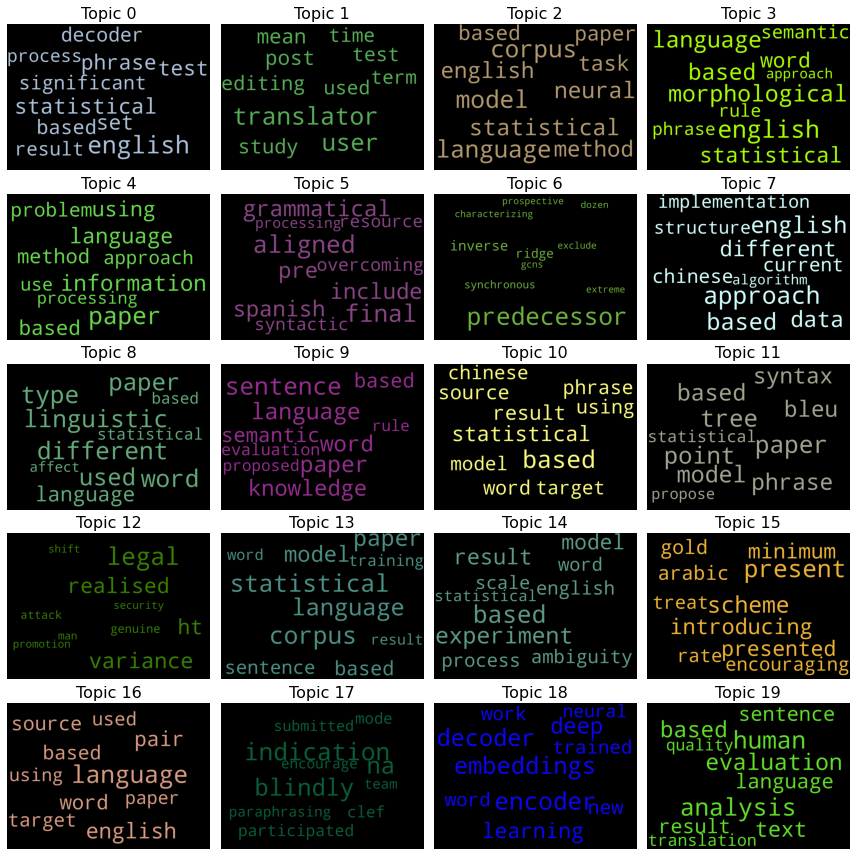

In [9]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = [color for name, color in mcolors.XKCD_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldan.show_topics(num_topics=20,formatted=False)
print('the number of topics is : '+str(len(topics)))
fig, axes = plt.subplots(5, 4, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
from operator import itemgetter

corpus_transformed_s = ldan[corpusn]
#corpus_transformed = ldan[0][corpusn[0]]
#len(corpus_transformed)
corpos = []
corpo = []
for corp in corpus_transformed_s:
    if len(corp) > 1:
        corpo.append([max(corp, key=itemgetter(1))])
    else:
        corpo.append(corp)
NewCorpus['Topic'] = corpo
#display the results for the IEEE database
NewCorpus.to_excel("19-07-21-Scopus\Fusion\LastCorpus\AllCorpusTopics.xlsx", index=False)
NewCorpus.head()

## 3rd Section : Topic Modeling with HDP-LDA

In [1]:
import os
import shutil

import re
import time
import pandas as pd

import pprint

#from gensim.models import Phrases
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
# NLTK Stop words

import spacy
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across'])

NewCorpus = pd.read_excel('19-07-21-Scopus\Fusion\LastCorpus\AllCorpus.xlsx',header=0)

NewCorpus['Titles & Keywords'] = NewCorpus['Title'] +' '+ NewCorpus['Author Keywords'] #+' '+ NewCorpus['Abstract'] #+' '+ NewCorpus['Year'].astype(str)
len(NewCorpus)

2064

In [2]:
import nltk
from sklearn.feature_extraction import text
stop_words = list(text.ENGLISH_STOP_WORDS)
import string

#Words not must be included in the analysis
removed = ['machine','translation','automatic','mt']
#Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = str(text).replace(punctuation, ' ')
    return text

#Lemmatizaion of the keywords
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(str(text))]

#merge words of a list into string 
def ListToString(lista):
    text = ''
    for word in lista:
        text += ' '+word
    return text

#Replace Abbreviation
def replace_Abbreviation(text):
    text = str(text).replace('smt', 'statistical')
    text = str(text).replace('nmt', 'neural')
    text = str(text).replace('rbmt','rule based')
    text = str(text).replace('hmt','Hybrid based')
    text = str(text).replace('dmt','direct based')
    text = str(text).replace('tbmt','transfer based')
    text = str(text).replace('cbmt','corpus based')
    text = str(text).replace('ebmt','example based')
    return text

#Apply Remove Punctuations
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(remove_punctuations)
#Remove Stop words:
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
#Lowercase Author Keywords
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.lower()
#Remove All words that could mess our classification
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in removed))
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(replace_Abbreviation)
#Apply the function lemmatization
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(lemmatize_text)
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].apply(ListToString)
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.replace('\d+', '')
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.replace('  ', ' ')
NewCorpus['Titles & Keywords'] = NewCorpus['Titles & Keywords'].str.split('©').str[0]
NewCorpus['Titles & Keywords'][0]

' a structure based model chinese organization alignment chunk hierarchical derivation named entity organization rule extraction structural analysis synchronous context free grammar'

In [3]:
# Convert to list
df = NewCorpus['Titles & Keywords'].values.tolist()

df = [re.sub('\S*@\S*\s?', '', sent) for sent in df]

# Remove new line characters
df = [re.sub('\s+', ' ', sent) for sent in df]

# Remove distracting single quotes
df = [re.sub("\'", "", sent) for sent in df]

print(df[:1])

df = [re.sub("-", " ", sent) for sent in df]
df = [re.sub(":", "", sent) for sent in df]

print(df[:2])

[' a structure based model chinese organization alignment chunk hierarchical derivation named entity organization rule extraction structural analysis synchronous context free grammar']
[' a structure based model chinese organization alignment chunk hierarchical derivation named entity organization rule extraction structural analysis synchronous context free grammar', ' ancient modern chinese new large training dataset ancient modern chinese parallel corpus bilingual text alignment neural']


In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_words = list(sent_to_words(df))
len(df_words)

2064

In [5]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df_words, min_count=5, threshold=10)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)


In [6]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#_core_web_sm
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from gensim.models import CoherenceModel, HdpModel
hdpmodel = HdpModel(corpus=corpus, id2word=id2word)
hdptopics = hdpmodel.show_topics(formatted=False)
print(str(len(hdptopics)))

In [ ]:
hdptopics[:2]

In [7]:
#import gensim.models.wrappers.ldamallet as ldamallet
#from gensim.models.wrappers import LdaMallet

import os
#from gensim.models.wrappers import LdaMallet
from gensim.models import CoherenceModel

os.environ['MALLET_HOME'] = "C:\\Users\\HP\\Desktop\\Equipe-ILC\\Automatisation\\LdaMallet\\mallet-2.0.8"

# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = "C:\\Users\\HP\\Desktop\\Equipe-ILC\\Automatisation\\LdaMallet\\mallet-2.0.8\\bin\\mallet" # update this path
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit=30, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    i = 0
    for num_topics in range(start, limit, step):
        print('iteration : '+str(i)+' when the number of topics is : '+str(num_topics))
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        i+=1
    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=2)

iteration : 0
iteration : 1
iteration : 2


In [ ]:
import matplotlib.pyplot as plt
# Show graph
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()